сбор данных на странице 1 , всего найдено 0
сбор данных на странице 2 , всего найдено 26
сбор данных на странице 3 , всего найдено 50
сбор данных на странице 4 , всего найдено 75
сбор данных на странице 5 , всего найдено 98
сбор данных на странице 6 , всего найдено 119
сбор данных на странице 7 , всего найдено 142
сбор данных на странице 8 , всего найдено 166
сбор данных на странице 9 , всего найдено 190
сбор данных на странице 10 , всего найдено 214
сбор данных на странице 11 , всего найдено 239
сбор данных на странице 12 , всего найдено 261
сбор данных на странице 13 , всего найдено 283
сбор данных на странице 14 , всего найдено 311
сбор данных на странице 15 , всего найдено 336
сбор данных на странице 16 , всего найдено 364
сбор данных на странице 17 , всего найдено 388
сбор данных на странице 18 , всего найдено 414
сбор данных на странице 19 , всего найдено 440
сбор данных на странице 20 , всего найдено 461
сбор данных на странице 21 , всего найдено 489
сбор данных на странице 22 ,

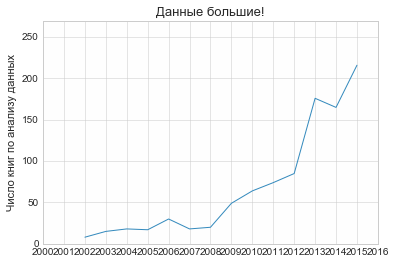

In [1]:
# -*- coding: utf-8 -*-

'''
Глава 9, рис. 1
'''

# Требует предварительной установки 

# Библиотеки BeautifulSoup: 
# 1) скачать библиотеку в формате wheel-файла https://pypi.python.org/pypi/beautifulsoup4/, 
# 2) скопировать в C:\Users\[ИМЯ_ПОЛЬЗОВАТЕЛЯ]\Anaconda3\Scripts
# 3) в окне командной строки выполнить pip install beautifulsoup4-4.5.1-py3-none-any.whl,
# где 4-4.5.1 - это версия библиотеки (может быть другой)
# Либо установить при помощи pip install beautifulsoup4

# Библиотеки html5lib: pip install html5lib
# Впрочем, библиотека BeautifulSoup может работать и без нее
# для этого в конструкторе нужно указать анализатор html - html.parser
# Например, soup = BeautifulSoup(requests.get(url).text, 'html.parser')  

from collections import Counter
import re

from bs4 import BeautifulSoup
import requests

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Arial'})
  
######
#
# КНИГИ О ДАННЫХ ИЗДАТЕЛЬСТВА O’Reilly 
#
######

# предикативная функция-определитель видео
def is_video(td):
    """если элемент имеет только один pricelabel, и текст внутри pricelabel
    без начальных пробелов начинается с 'Video', то значит это видео"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
            pricelabels[0].text.strip().startswith("Video"))

# информация о книге
def book_info(td):
    """имея на входе объект Tag для <td> библиотеки BeautifulSoup, который 
    обозначает книгу, извлечь описание книги и вернуть словарь dict"""
    title = td.find("div", "thumbheader").a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
    isbn_link = td.find("div", "thumbheader").a.get("href")
    
    # re.match захватывает часть текста, соответствующего  
    # регулярному выражению в круглых скобках
    isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
    date = td.find("span", "directorydate").text.strip()
    
    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }


from time import sleep

# данные на середину янв. 2016 - 42 страницы 
# данные на середину дек. 2015 - 40 страниц 
# данные на момент написания сценария - 31 страница
NUM_PAGES = 42

def scrape(n_pages=NUM_PAGES): 
    base_url = "http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page="

    books = []

    for page_num in range(1, n_pages + 1):
        print ("сбор данных на странице", page_num, ", всего найдено", len(books))
        url = base_url + str(page_num)
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')  # 'html5lib'
            
        for td in soup('td', 'thumbtext'):
            if not is_video(td):
                books.append(book_info(td))

        # как примерные граждане, будем уважать robots.txt!
        sleep(30)  # 30 сек. задержка 

    return books

# получить год
def get_year(book):
    """book["date"] выглядит как 'December 2015', поэтому нужно 
    разбить строку по пробелу и взять вторую часть"""
    return int(book["date"].split()[1])

# хронометраж работы сценария:  
#    num_pages * 
#   (30 сек. задержка + время обработки страницы несколько сек.) 
def plot_years(books):
    fig = plt.figure()
    
    # число лет
    # 2015 год – последний полный год данных (на момент тестирования сценария)   
    year_counts = Counter(get_year(book) for book in books
                          if get_year(book) <= 2015)

    years = sorted(year_counts)
    book_counts = [year_counts[year] for year in years]
    
    plt.plot(years, book_counts, color="#348ABD")

    plt.axis([2000, 2016, 0, 270])
    plt.xticks([2000,2001,2002,2003,2004,2005,
                2006,2007,2008,2009,2010,2011,
                2012,2013,2014,2015,2016])
    #plt.xlabel("Год", fontsize=11)
    plt.ylabel("Число книг по анализу данных", fontsize=11)
    plt.title("Данные большие!", fontsize=13)
    plt.show()
    #fig.savefig("fig_9-1", dpi=300, bbox_inches='tight', facecolor='w') 

plot_years(scrape())  # 42 страницы книг на янв 2016

In [ ]:
'''
данные на 19-01-2016

сбор данных на странице 1 , всего найдено 0
сбор данных на странице 2 , всего найдено 26
сбор данных на странице 3 , всего найдено 48
сбор данных на странице 4 , всего найдено 73
сбор данных на странице 5 , всего найдено 97
сбор данных на странице 6 , всего найдено 118
сбор данных на странице 7 , всего найдено 146
сбор данных на странице 8 , всего найдено 167
сбор данных на странице 9 , всего найдено 195
сбор данных на странице 10 , всего найдено 219
сбор данных на странице 11 , всего найдено 244
сбор данных на странице 12 , всего найдено 267
сбор данных на странице 13 , всего найдено 293
сбор данных на странице 14 , всего найдено 317
сбор данных на странице 15 , всего найдено 342
сбор данных на странице 16 , всего найдено 366
сбор данных на странице 17 , всего найдено 389
сбор данных на странице 18 , всего найдено 416
сбор данных на странице 19 , всего найдено 442
сбор данных на странице 20 , всего найдено 469
сбор данных на странице 21 , всего найдено 495
сбор данных на странице 22 , всего найдено 525
сбор данных на странице 23 , всего найдено 553
сбор данных на странице 24 , всего найдено 579
сбор данных на странице 25 , всего найдено 607
сбор данных на странице 26 , всего найдено 636
сбор данных на странице 27 , всего найдено 663
сбор данных на странице 28 , всего найдено 691
сбор данных на странице 29 , всего найдено 716
сбор данных на странице 30 , всего найдено 742
сбор данных на странице 31 , всего найдено 769
сбор данных на странице 32 , всего найдено 797
сбор данных на странице 33 , всего найдено 825
сбор данных на странице 34 , всего найдено 850
сбор данных на странице 35 , всего найдено 879
сбор данных на странице 36 , всего найдено 909
сбор данных на странице 37 , всего найдено 939
сбор данных на странице 38 , всего найдено 969
сбор данных на странице 39 , всего найдено 999
сбор данных на странице 40 , всего найдено 1029
сбор данных на странице 41 , всего найдено 1059
сбор данных на странице 42 , всего найдено 1089
'''